## Explanations in Uncommon(?) Places

In [1]:
import pandas as pd
import nltk
import glob
import os
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
path = '/Users/Svesketerning/Google-Drev/experiments'
timestr = time.strftime("%Y%m%d-%H%M")
np.random.seed(42) 

In [2]:
# Input context dataframe. focuswords. which context, if any. 
# And if should remove sentences with focuswords, or keep those
contexts=['outer','theorem', 'meta', 'proof', 'other'],
def sentence_extract(df,focuswords, contexts = None, remove_focuswords = False):
    if contexts is not None: # Focus on context
        df = df[df['context'].isin(contexts)]
    for i in df.index:
        sent = df.loc[i,'sentence']
        tokenize_sent = nltk.word_tokenize(sent)
        if any(x in focuswords for x in tokenize_sent) is remove_focuswords:
            df = df.drop(index=i)
    return df 

In [3]:
LatestDatabaseFile = max(glob.iglob('/Users/Svesketerning/Google-Drev/experiments/database-files/arxiv_extended_database*'),key=os.path.getctime)
df_arxiv = pd.read_feather(LatestDatabaseFile)

LatestExplanationFile = max(glob.iglob('/Users/Svesketerning/Google-Drev/experiments/database-files/explain_fullraw*'),key=os.path.getctime)
explanation_df = pd.read_feather(LatestExplanationFile)

### Explanations in Theorem Contexts

In [ ]:
theorem_df = sentence_extract(explanation_df,[], contexts = ['theorem'], remove_focuswords = True)
theorem_df = theorem_df.reset_index()
theorem_df.to_feather(path+'/proof-theorem-explanations/theorem_explanation'+timestr+'.feather')

In [ ]:
#theorem_df

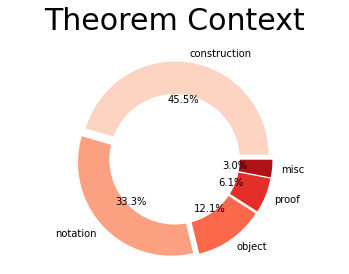

In [2]:
theorem_classification = pd.read_csv('/Users/Svesketerning/Google-Drev/experiments/qualitative-classification/theorem-Table 1.csv',
           error_bad_lines=False, delimiter = ';')['kind']
theorem_classification = theorem_classification.replace(to_replace = ['facts'],
                                                       value = 'misc')
# Pie chart 
fig1, ax1 = plt.subplots()
plt.title(label = 'Theorem Context', fontsize = 30, pad=20)
ax1.pie(theorem_classification.value_counts(), 
        labels = theorem_classification.value_counts().index,
#        textprops={'fontsize': 20},
        autopct='%1.1f%%',
        explode = [0.05]*len(theorem_classification.unique()),
        colors=sns.color_palette("Reds", n_colors=len(theorem_classification.unique())))
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.savefig(path+'/figures/theorem_piechart'+timestr+'.pdf', bbox_inches='tight')
plt.show()

### Explanations in Proof and Outer Contexts

In [ ]:
outer_df = sentence_extract(explanation_df,[], contexts = ['outer'], remove_focuswords = True)
proof_df = sentence_extract(explanation_df,[], contexts = ['proof'], remove_focuswords = True)
outer_df.reset_index().to_feather(path+'/proof-theorem-explanations/outer_explanation'+timestr+'.feather')
proof_df.reset_index().to_feather(path+'/proof-theorem-explanations/proof_explanation'+timestr+'.feather')

In [ ]:
Latestproof_dfFile = max(glob.iglob(path+'/proof-theorem-explanations/proof_explanation*'),key=os.path.getctime)
proof_df = pd.read_feather(Latestproof_dfFile)
Latestouter_dfFile = max(glob.iglob(path+'/proof-theorem-explanations/outer_explanation*'),key=os.path.getctime)
outer_df = pd.read_feather(Latestouter_dfFile)


pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_colwidth', None)
outer_50sample = outer_df.sample(50) # The samples to look, done this wy to ensure rng 
proof_50sample = proof_df.sample(50)

##### Take 50 of each and classify them

In [ ]:
outer_50sample

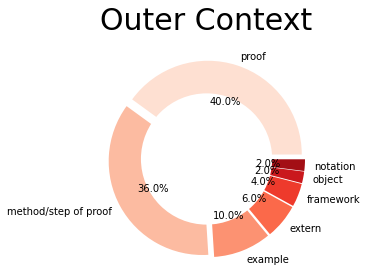

In [3]:
outer_classification = pd.read_csv('/Users/Svesketerning/Google-Drev/experiments/qualitative-classification/outer-Table 1.csv',
           error_bad_lines=False, delimiter = ';')['kind']
fig1, ax1 = plt.subplots()
plt.title(label = 'Outer Context', fontsize = 30, pad=20)
ax1.pie(outer_classification.value_counts(), 
        labels = outer_classification.value_counts().index,
        autopct='%1.1f%%',
        explode = [0.05]*len(outer_classification.unique()),
        colors=sns.color_palette("Reds", n_colors=len(outer_classification.unique())))
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.savefig(path+'/figures/outer_piechart'+timestr+'.pdf', bbox_inches='tight')
plt.show()

In [ ]:
proof_50sample

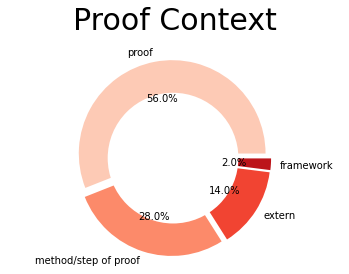

In [4]:
proof_classification = pd.read_csv('/Users/Svesketerning/Google-Drev/experiments/qualitative-classification/proof-Table 1.csv',
           error_bad_lines=False, delimiter = ';')['kind']
fig1, ax1 = plt.subplots()
plt.title(label = 'Proof Context', fontsize = 30, pad=20)
ax1.pie(proof_classification.value_counts(), 
        labels = proof_classification.value_counts().index,
        autopct='%1.1f%%',
        explode = [0.05]*len(proof_classification.unique()),
        colors=sns.color_palette("Reds", n_colors=len(proof_classification.unique())))
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.savefig(path+'/figures/proof_piechart'+timestr+'.pdf', bbox_inches='tight')
plt.show()